In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
from pandas.plotting import scatter_matrix

from app import Bank
import app.utils

In [3]:
bank = Bank('DKB')
print(f'Bank: {bank.name}')

Bank: DKB


## Accounts

In [4]:
bank.accounts

,id,firstname,lastname,balance


## Transactions

In [5]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp


## Open Accounts

In [6]:
bank.open_account(account_id=1, firstname='Dalia', lastname='Das')
bank.open_account(account_id=2, firstname='Matthias', lastname='Rettenmeier')
bank.open_account(account_id=3, firstname='Manuel', lastname='Wiedenmann')

,id,firstname,lastname,balance
0,1,Dalia,Das,0.0
1,2,Matthias,Rettenmeier,0.0
2,3,Manuel,Wiedenmann,0.0


## Add transactions

In [7]:
bank.add_transaction(transaction_id=0,
                     sender_id=1,
                     recipient_id=2,
                     subject='Mein Weltbild',
                     amount=100.0,
                     category='Bücher',
                     timestamp=datetime.datetime.utcnow())

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.0,Mein Weltbild,Bücher,2019-02-11 12:46:39.848226


In [29]:
transactions = [
    {'transaction_id': 1,
     'sender_id': 1,
     'recipient_id': 2,
     'subject': 'Data Science für Dummies',
     'amount': 26.99,
     'category': 'Bücher',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 2,
     'sender_id': 1,
     'recipient_id': 3,
     'subject': 'Python programmieren lernen für Dummies',
     'amount': 19.99,
     'category': 'Bücher',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 3,
     'sender_id': 3,
     'recipient_id': 1,
     'subject': 'Mittagessen',
     'amount': 20.,
     'category': 'Essen',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 4,
     'sender_id': 2,
     'recipient_id': 3,
     'subject': 'Drinks',
     'amount': 40.,
     'category': 'Lifestyle',
     'timestamp': app.utils.random_timestamp()},
]

for transaction in transactions:
    bank.add_transaction(**transaction)
    
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:46:39.848226,19.0
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 13:03:18.835006,NaN
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-08 13:03:18.836633,NaN
3,3,3,1,20.00,Mittagessen,Essen,2018-03-03 13:03:18.836645,NaN
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-11 13:03:18.836648,NaN


In [31]:
bank.transactions.describe()

,amount,tax_amount
count,5.000000,1.0
mean,41.396000,19.0
std,33.763575,NaN
min,19.990000,19.0
25%,20.000000,19.0
50%,26.990000,19.0
75%,40.000000,19.0
max,100.000000,19.0


## .groupby() + agg()

In [32]:
grouped_by_category = bank.transactions.groupby('category')

In [61]:
grouped_by_category.agg({'id': 'count'})

,id
category,
Bücher,3
Essen,1
Lifestyle,1


In [12]:
grouped_by_category.agg({'amount': 'sum'})

,amount
category,
Bücher,100.0


In [34]:
grouped_by_category.agg({'amount': 'max'})

,amount
category,
Bücher,100.0
Essen,20.0
Lifestyle,40.0


In [35]:
grouped_by_category.agg({'amount': 'min'})

,amount
category,
Bücher,19.99
Essen,20.00
Lifestyle,40.00


### Tasks

- Group by sender_id
- Group by recipient_id


## Cleanup

In [26]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount
0,0,1,2,100.0,Mein Weltbild,Bücher,2019-02-11 12:46:39.848226,19.0


In [16]:
bank.transactions.drop_duplicates('id', inplace=True)

In [17]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.0,Mein Weltbild,Bücher,2019-02-11 12:46:39.848226


In [18]:
bank.transactions.sort_values('timestamp', inplace=True)

In [19]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.0,Mein Weltbild,Bücher,2019-02-11 12:46:39.848226


## Add columns

In [51]:
# Wir erstellen eine neue Column tax_amount indem wir die Column amount mit 0.19 multiplizieren
bank.transactions['tax_amount'] = bank.transactions['amount'] * 0.19

In [52]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:46:39.848226,19.0000,0.07
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 13:03:18.835006,5.1281,0.07
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-08 13:03:18.836633,3.7981,0.07
3,3,3,1,20.00,Mittagessen,Essen,2018-03-03 13:03:18.836645,3.8000,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-11 13:03:18.836648,7.6000,0.19


### Tasks

- [.apply() docs](http://pandas.pydata.org/pandas-docs/version/0.24/reference/api/pandas.DataFrame.apply.html)

In [53]:
# Unser dict zum Zuordnen der richtigen Steuersätze
# Key ist die Category, der value ist der Stuersatz
tax_rates = {
    'Bücher': 0.07,
    'Essen': 0.07,
    'Lifestyle': 0.19,
}

# Erstelle eine neue Column tax_rate indem du auf der Column category .apply() aufrufst
# Nutze das tax_rates dict in der lambda function von .apply()
bank.transactions['tax_rate'] = bank.transactions['category'].apply(lambda x: tax_rates[x])

In [60]:
bank.transactions['category']

0       Bücher
1       Bücher
2       Bücher
3        Essen
4    Lifestyle
Name: category, dtype: object

In [54]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:46:39.848226,19.0000,0.07
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 13:03:18.835006,5.1281,0.07
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-08 13:03:18.836633,3.7981,0.07
3,3,3,1,20.00,Mittagessen,Essen,2018-03-03 13:03:18.836645,3.8000,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-11 13:03:18.836648,7.6000,0.19


In [62]:
# Berechne nun den richtigen tax_amount auf Grundlage der tax_rate Column
bank.transactions['tax_amount'] = bank.transactions['amount']*bank.transactions['tax_rate']

In [59]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:46:39.848226,7.0000,0.07
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 13:03:18.835006,1.8893,0.07
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-08 13:03:18.836633,1.3993,0.07
3,3,3,1,20.00,Mittagessen,Essen,2018-03-03 13:03:18.836645,1.4000,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-11 13:03:18.836648,7.6000,0.19


## Filter with .loc[]

In [63]:
# Filter alle Bücher
bank.transactions.loc[bank.transactions['category'] == 'Bücher']

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:46:39.848226,7.0000,0.07
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 13:03:18.835006,1.8893,0.07
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-08 13:03:18.836633,1.3993,0.07


In [72]:
# Filter alle Transaktionen mit einem amount > 20

bank.transactions.loc[bank.transactions['amount'] > 20]

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:46:39.848226,7.0000,0.07
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 13:03:18.835006,1.8893,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-11 13:03:18.836648,7.6000,0.19


In [68]:
# Filter alle Bücher mit einem amount > 20

# Erst die Bücher
books = bank.transactions.loc[bank.transactions['category'] == 'Bücher']

# Dann den amount
books_with_amount_greater_20 = books.loc[books['amount'] > 20]

books_with_amount_greater_20

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-11 12:46:39.848226,7.0000,0.07
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 13:03:18.835006,1.8893,0.07


In [89]:
# Filter alle Transaktionen nach einem Datum (timestamp)
timestamp = app.utils.random_timestamp()



bank.transactions.loc[bank.transactions['timestamp'] < timestamp ]


,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-04-11 13:03:18.835006,1.8893,0.07
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-03-08 13:03:18.836633,1.3993,0.07
3,3,3,1,20.00,Mittagessen,Essen,2018-03-03 13:03:18.836645,1.4000,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2018-03-11 13:03:18.836648,7.6000,0.19


## Plots

In [91]:
by_timestamp = bank.transactions.set_index('timestamp')

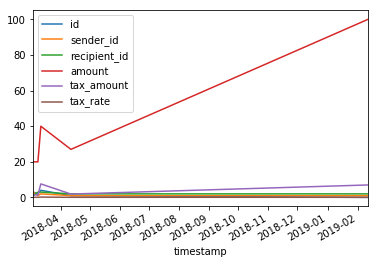

In [96]:
by_timestamp.plot( )

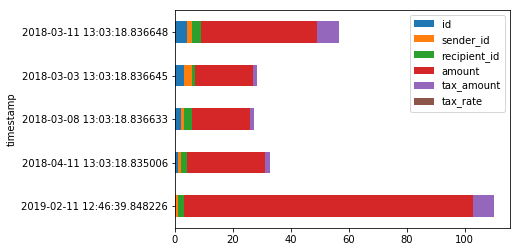

In [98]:
by_timestamp.plot.barh(stacked=True)